# Comparação de modelos de classificação supervisionados para encontrar os melhores potenciais clientes de uma agência bancária.

O banco Thera Bank possui uma base de clientes crescente. A maioria
desses clientes são passivos (depositantes) com depósitos de tamanhos
variados. O número de clientes que também são devedores (clientes de
ativos) é bastante pequeno, e o banco está interessado em expandir essa
base rapidamente para trazer mais negócios de crédito e, no processo,
ganhar mais com os juros dos empréstimos.

Em particular, a administração
deseja explorar maneiras de converter seus clientes passivos em clientes de
empréstimos pessoais (enquanto os mantém como depositantes). Uma
campanha que o banco realizou no ano passado para clientes passivos
mostrou uma taxa de conversão saudável de mais de 9% de sucesso. Isso
encorajou o departamento de marketing de varejo a elaborar campanhas
para melhor direcionar o marketing, a fim de aumentar a taxa de sucesso
com um orçamento mínimo.

O departamento quer construir um modelo de classificação que os
ajude a identificar os clientes potenciais com maior probabilidade de
adquirir o empréstimo. Isso aumentará a taxa de sucesso e, ao mesmo
tempo, reduzirá o custo da campanha.
A base de dados histórica contém informações pessoais dos clientes e
informações sobre produtos contratados. O arquivo também contém um
dicionário das variáveis.

### informações relevante do dataset:


##### Variáveis categóricas:
Personal Loan (Empréstimo Pessoal) - Este cliente aceitou o empréstimo pessoal oferecido na última campanha? Esta é a nossa variável alvo

Securities Account (Conta de títulos) - O cliente possui conta de títulos no banco?

CD Account (Conta de CD) - O cliente tem uma conta de certificado de depósito (CD) no banco?

Online - O cliente usa serviços de banco pela Internet?

Credit Card - (Cartão de crédito) - O cliente usa um cartão de crédito emitido pelo UniversalBank?

#### Variáveis contínuas:

Age (Idade) Idade do cliente

Experience (Experiência) - anos de experiência

Income (Renda) - Renda anual em dólares

CCAvg (CCAvg) - gasto médio com cartão de crédito

Mortage (Hipoteca) - Valor da hipoteca da casa

##### Variáveis categóricas ordinais:

Family (Família) - tamanho da família do cliente
#Education (Educação) - nível de educação do cliente

# _LET'S DO IT_

In [115]:
# importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# KNN
from sklearn.neighbors import KNeighborsClassifier
# Regressão Logística
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import SVC
# Naives Bayes
from sklearn.naive_bayes import GaussianNB  
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# XGboost
from xgboost import XGBClassifier, train


# ferramenta de teste de hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [116]:
# Carregando base de dados
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx" , sheet_name='Data')

In [117]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [118]:
# analizando as dimensões do dataset
print('{} linhas e {} colunas.' .format(df.shape[0], df.shape[1]))

5000 linhas e 14 colunas.


In [119]:
# informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [120]:
# quantidade de valores nulos
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [121]:
#Excluindo variáveis não úteis

df = df.drop(columns=["ID", "ZIP Code"])

In [122]:
# Estatística básica das variáveis

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [123]:
# analisando as correlações
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [124]:
# Distruibuição da variáveis target
df["Personal Loan"].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [125]:
# Pelo fato da base ser desbalanceada, não iremos usar toda a classe 0.
# Iremos pegar uma amostra e juntar com o registros da classe 1 para podermos modelar de forma mais justa.

df_classe_1 = df[df["Personal Loan"] == 1]
df_classe_0 = df[df["Personal Loan"] == 0].sample(n=1500)
df = df_classe_1.append(df_classe_0)

In [126]:
# Dividindo preditores (X) e variável target (Y)

X = df.drop(columns=["Personal Loan"])
Y = df["Personal Loan"]

In [127]:
# Dividindo a base em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (1584, 11)
Shape y_train: (1584,)
Shape X_test: (396, 11)
Shape y_test: (396,)


In [128]:
# Normalização das variáveis

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformanda para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)


## Implementando os modelos classificadores de predição 

### Modelo Classificador KNN

In [129]:
# analisando o melhor valor de do parâmetro K para mlehorar nosso modelo

scores_list = []
K_neighbors= range(3,15)

for k in K_neighbors:
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))

In [130]:
# valores preditos
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

Text(0, 0.5, 'Acurácia')

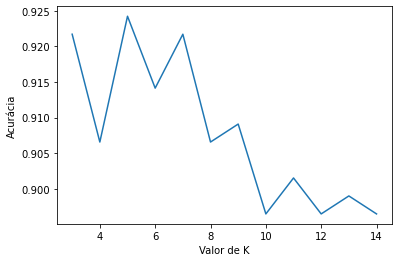

In [131]:
# visualizando o valor de K com melhor acurácia
plt.plot(K_neighbors, scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [132]:
# valores das métricas de avaliação do classificador
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 89.64646464646465%
Precision: 94.5945945945946%
Recall: 65.42056074766354%
F1: 77.34806629834254%


### Regressão Logística

In [133]:
# atribuindo o modelo em uma variável
clf = LogisticRegression()

In [134]:
# treinando o modelo
clf.fit(X_train, y_train)

LogisticRegression()

In [135]:
# fazendo a predição
y_pred = clf.predict(X_test)

In [136]:
# distribuição dos betas
clf.coef_

array([[-0.19377563,  0.24253061,  7.59600104,  1.43762241,  1.95611027,
         2.06922399,  0.57746854, -0.84621962,  2.92145611, -0.46560543,
        -1.00888843]])

In [137]:
# metricas de avaliação
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 91.91919191919192%
Precision: 89.47368421052632%
Recall: 79.43925233644859%
F1: 84.15841584158417%


### SVM

In [138]:
clf = SVC(kernel='poly', decision_function_shape='ovo')

In [139]:
clf.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [140]:
y_pred = clf.predict(X_test)

In [141]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 95.2020202020202%
Precision: 94.0%
Recall: 87.85046728971963%
F1: 90.82125603864735%


### Naives Bayes

In [142]:
clf = GaussianNB()

In [143]:
clf.fit(X_train, y_train)

GaussianNB()

In [144]:
y_pred = clf.predict(X_test)

In [145]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 86.11111111111111%
Precision: 74.52830188679245%
Recall: 73.83177570093457%
F1: 74.17840375586854%


### Decision Tree

In [146]:
clf_dt = DecisionTreeClassifier()

In [147]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [148]:
y_pred = clf_dt.predict(X_test)

In [149]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 97.97979797979798%
Precision: 96.26168224299066%
Recall: 96.26168224299066%
F1: 96.26168224299066%


### Random forest

In [150]:
clf = RandomForestClassifier(n_estimators=200)

In [151]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [152]:
y_pred = clf.predict(X_test)

In [153]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 98.23232323232324%
Precision: 97.16981132075472%
Recall: 96.26168224299066%
F1: 96.71361502347416%


### Gradient Boosting

In [154]:
clf = GradientBoostingClassifier(n_estimators=200, subsample=1)

In [155]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, subsample=1)

In [156]:
y_pred = clf.predict(X_test)

In [157]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 98.73737373737373%
Precision: 98.11320754716981%
Recall: 97.19626168224299%
F1: 97.65258215962442%


### XGboost

In [158]:
clf = XGBClassifier(n_estimators=200, use_label_encoder=False)

In [159]:
clf.fit(X_train, y_train)

[06:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [160]:
y_pred = clf.predict(X_test)

In [161]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 98.48484848484848%
Precision: 98.09523809523809%
Recall: 96.26168224299066%
F1: 97.1698113207547%


### O melhor modelo para a predição foi o Gradiente Boosting, agora vamos melhorar este modelo um pouco mais.

In [175]:
# melhorando valores de hiperparâmetros

clf = GradientBoostingClassifier(n_estimators=200,
                                 subsample=1,
                                 min_samples_split=4,
                                 min_samples_leaf=3,
                                 max_depth=4,
                                 validation_fraction=0.2,)

   
clf.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=4,
                           n_estimators=200, subsample=1,
                           validation_fraction=0.2)

In [176]:
y_pred = clf.predict(X_test)

In [177]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 98.98989898989899%
Precision: 98.13084112149532%
Recall: 98.13084112149532%
F1: 98.13084112149532%


### Como pode-se ver com o modelo otimizado , obtivemos uma melhora em relação ao modelo de Gradient Boosting treinado com valores padrões para a previsão de cliente potenciais a adquirir um empréstimo.